In [1]:
import pandas as pd

# Предобработка

In [2]:
df = pd.read_csv("tcs_only_modeling_abt.tsv", sep='\t')

In [3]:
df.columns

Index(['uid', 'tech_obs_id', 'app_bank_nm', 'tech_dog_type', 'trg_pd',
       'trg_utilization', 'trg_grace', 'tech_target_source', 'tech_target_d',
       'var_001',
       ...
       'var_461', 'var_462', 'var_463', 'var_464', 'var_465', 'var_466',
       'var_467', 'var_468', 'var_469', 'var_470'],
      dtype='object', length=479)

In [4]:
df.head()

,uid,tech_obs_id,app_bank_nm,tech_dog_type,trg_pd,trg_utilization,trg_grace,tech_target_source,tech_target_d,var_001,...,var_461,var_462,var_463,var_464,var_465,var_466,var_467,var_468,var_469,var_470
0,2610726,15,tinkoff,error,0,0.0,0,target_from_tinkoff,2015-09-28,0,...,11.87,11.87,23.74,0.0,11.87,35.61,11.87,0.0,0.0,0.0
1,2610519,22,tinkoff,error,0,0.0,1,target_from_tinkoff,2015-01-28,0,...,11.87,11.87,11.87,0.0,0.00,11.87,11.87,0.0,0.0,0.0
2,2610399,29,tinkoff,error,0,0.0,1,target_from_tinkoff,2015-10-20,0,...,0.00,11.87,11.87,0.0,0.00,11.87,11.87,0.0,0.0,0.0
3,2609761,50,tinkoff,error,0,0.0,1,target_from_tinkoff,2015-03-20,0,...,0.00,11.87,11.87,0.0,23.74,35.61,23.74,0.0,0.0,0.0
4,2609487,57,tinkoff,error,0,0.0,1,target_from_tinkoff,2015-04-14,0,...,0.00,11.87,0.00,0.0,11.87,11.87,11.87,0.0,0.0,0.0


In [5]:
data = df.drop(["uid", "tech_obs_id", "app_bank_nm", "tech_dog_type", "trg_utilization", "tech_target_source", "tech_target_d"],
               axis = 1)
data = data.drop(['var_0{}'.format(i) for i in range(63, 73 + 1)], axis = 1)
data = data.dropna()

In [6]:
data = pd.get_dummies(data)
y1 = data['trg_pd']
#y2 = data['trg_grace']
data.head()

,trg_pd,trg_grace,var_001,var_002,var_003,var_004,var_005,var_006,var_007,var_008,...,var_062_mts,var_062_orient,var_062_pochta,var_062_renaissance,var_062_rosbank,var_062_sbrf,var_062_tinkoff,var_062_ubrr,var_062_uralsib,var_062_vtb24
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [8]:
type(data)

pandas.core.frame.DataFrame

# Матрица корреляции

In [13]:
cor = data.corr()
cor_target = abs(cor['trg_pd'])
relevant_features = cor_target[cor_target > 0.03]
relevant_features

trg_pd       1.000000
trg_grace    0.084311
var_003      0.039226
var_046      0.041471
var_049      0.048757
var_078      0.038987
var_082      0.039981
var_084      0.039455
var_108      0.033560
var_157      0.039061
var_162      0.031485
var_220      0.046846
var_228      0.030048
var_248      0.032622
var_297      0.032990
var_329      0.049312
var_331      0.031457
var_335      0.033345
var_338      0.033450
var_344      0.040266
var_350      0.031201
var_364      0.031059
var_375      0.032938
var_383      0.049573
var_384      0.048013
var_390      0.049667
var_420      0.033263
var_428      0.039558
var_431      0.034269
var_432      0.044146
var_440      0.051171
var_441      0.032569
var_442      0.030223
var_445      0.034211
var_447      0.030428
var_449      0.055900
Name: trg_pd, dtype: float64

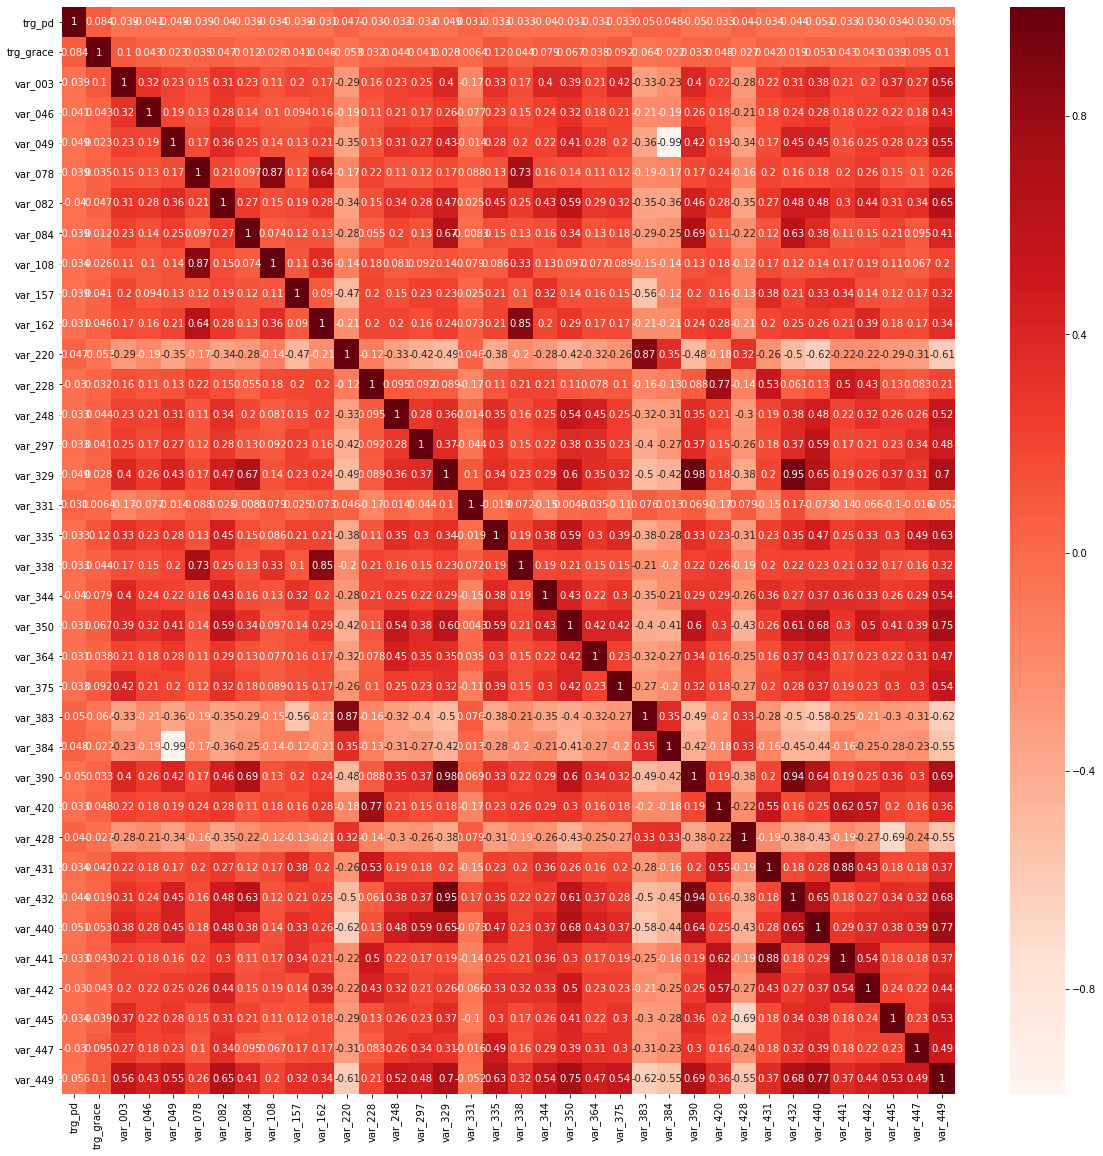

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
relevant_cor = data[relevant_features.index].corr()
plt.figure(figsize = (20, 20))
sns.heatmap(relevant_cor, annot=True, cmap=plt.cm.Reds)
plt.show()

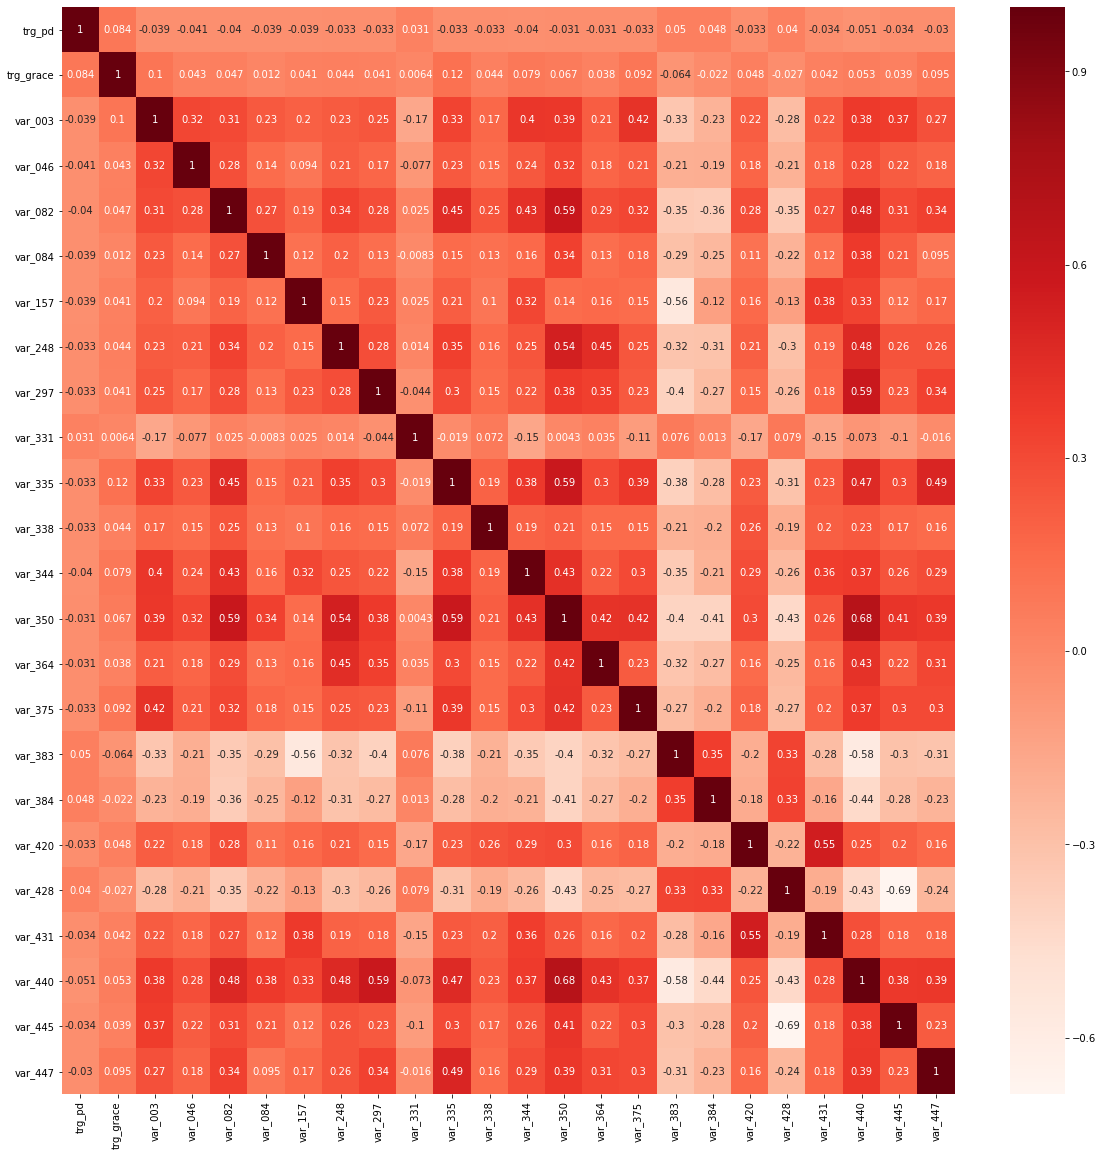

In [21]:
plt.figure(figsize = (20, 20))
sns.heatmap(data[relevant_features.drop(['var_049', 'var_220', 'var_329',
                                         'var_442', 'var_441', 'var_078', 
                                        'var_108', 'var_228', 'var_390',
                                         'var_162', 'var_432', 'var_449']).index].corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [22]:
features1 = relevant_features.drop(['var_049', 'var_220', 'var_329',
                                         'var_442', 'var_441', 'var_078', 
                                        'var_108', 'var_228', 'var_390',
                                         'var_162', 'var_432', 'var_449', 'trg_pd', 'trg_grace']).index

In [30]:
len(features1)

22

# Backward Elimination

In [26]:
features_be = cor_target[cor_target > 0.02]

In [27]:
data_be = data[features_be.index]
data_be = data_be.drop(columns=['trg_pd', 'trg_grace'])
data_be.head()

,var_001,var_003,var_009,var_039,var_046,var_049,var_050,var_051,var_058,var_078,...,var_443,var_445,var_446,var_447,var_449,var_450,var_452,var_461,var_062_orient,var_062_pochta
0,-0.167919,-0.767992,0.655862,-0.108149,-0.374328,-0.741711,0.954899,-0.1643,-0.170343,-0.323012,...,-0.284510,-0.611712,-0.227628,-0.5055,-0.883338,1.106116,-0.380204,1.243682,-0.058819,-0.137902
1,-0.167919,-0.767992,0.655862,-0.108149,-0.374328,1.348234,-1.047232,-0.1643,-0.170343,0.037454,...,-0.274828,-0.611712,-0.227628,-0.5055,-0.551405,1.577864,-0.304032,1.243682,-0.058819,-0.137902
2,-0.167919,-0.767992,0.655862,-0.108149,-0.374328,-0.741711,-1.047232,-0.1643,-0.170343,0.053033,...,0.122516,0.938619,-0.227628,-0.5055,0.610358,-0.309128,0.253027,-0.592796,-0.058819,-0.137902
3,-0.167919,-0.767992,0.655862,-0.108149,-0.374328,1.348234,0.954899,-0.1643,-0.170343,-0.109212,...,0.317058,0.938619,-0.227628,-0.5055,0.610358,1.577864,-0.216758,-0.592796,-0.058819,-0.137902
4,-0.167919,-0.767992,-1.524711,-0.108149,-0.374328,1.348234,0.954899,-0.1643,-0.170343,-0.623841,...,-0.262114,-0.611712,-0.227628,-0.5055,-0.883338,-1.016750,-0.324011,-0.592796,-0.058819,-0.137902


In [28]:
import statsmodels.api as sm
cols = list(data_be.columns)
pmax = 1
while len(cols) > 0:
    p = []
    data_be_1 = data_be[cols]
    data_be_1 = sm.add_constant(data_be_1)
    model = sm.Logit(list(y1), data_be_1).fit() # y1 - pd
    p = pd.Series(model.pvalues.values[1:], index = cols)      
    pmax = max(p)
    feature_with_pmax = p.idxmax()
    if pmax > 0.05:
        cols.remove(feature_with_pmax)
    else:
        break
selected_features_be = cols
selected_features_be

Optimization terminated successfully.
         Current function value: 0.231108
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.231108
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.231108
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.231108
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.231108
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.231108
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.231108
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.231108
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.231108
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.231108
  

Optimization terminated successfully.
         Current function value: 0.231490
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.231505
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.231520
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.231543
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.231562
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.231586
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.231611
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.231635
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.231661
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.231691
  

['var_001',
 'var_039',
 'var_046',
 'var_049',
 'var_051',
 'var_078',
 'var_084',
 'var_090',
 'var_091',
 'var_107',
 'var_123',
 'var_133',
 'var_136',
 'var_138',
 'var_175',
 'var_182',
 'var_188',
 'var_189',
 'var_198',
 'var_203',
 'var_220',
 'var_224',
 'var_234',
 'var_242',
 'var_254',
 'var_257',
 'var_286',
 'var_292',
 'var_312',
 'var_338',
 'var_365',
 'var_373',
 'var_378',
 'var_390',
 'var_398',
 'var_405',
 'var_406',
 'var_429',
 'var_440',
 'var_446',
 'var_447',
 'var_461',
 'var_062_orient']

In [29]:
len(selected_features_be)

43

# Lasso regression

In [31]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
clf = SGDClassifier(loss='log', penalty='l1')

In [32]:
features_lasso = cor_target[cor_target > 0]
data_lasso = data[features_lasso.index]
data_lasso = data_lasso.drop(columns=['trg_pd', 'trg_grace'])
data_lasso.head()

,var_001,var_002,var_003,var_004,var_005,var_006,var_007,var_008,var_009,var_010,...,var_062_mts,var_062_orient,var_062_pochta,var_062_renaissance,var_062_rosbank,var_062_sbrf,var_062_tinkoff,var_062_ubrr,var_062_uralsib,var_062_vtb24
0,-0.167919,0.673893,-0.767992,-0.073527,1.374671,-0.070758,-0.480494,-0.125601,0.655862,-0.166119,...,-0.046598,-0.058819,-0.137902,-0.035815,-0.126636,0.655344,-0.087093,-0.087736,-0.141723,-0.360996
1,-0.167919,0.673893,-0.767992,-0.073527,-0.727447,-0.070758,-0.480494,-0.125601,0.655862,-0.166119,...,-0.046598,-0.058819,-0.137902,-0.035815,-0.126636,0.655344,-0.087093,-0.087736,-0.141723,-0.360996
2,-0.167919,0.673893,-0.767992,-0.073527,-0.727447,-0.070758,-0.480494,-0.125601,0.655862,-0.166119,...,-0.046598,-0.058819,-0.137902,-0.035815,-0.126636,0.655344,-0.087093,-0.087736,-0.141723,-0.360996
3,-0.167919,0.673893,-0.767992,-0.073527,1.374671,-0.070758,-0.480494,-0.125601,0.655862,-0.166119,...,-0.046598,-0.058819,-0.137902,-0.035815,-0.126636,-1.525916,-0.087093,-0.087736,-0.141723,2.770113
4,-0.167919,-1.483916,-0.767992,-0.073527,-0.727447,-0.070758,-0.480494,-0.125601,-1.524711,-0.166119,...,-0.046598,-0.058819,-0.137902,-0.035815,-0.126636,0.655344,-0.087093,-0.087736,-0.141723,-0.360996


In [33]:
clf.fit(data_lasso, y1)
print(clf.coef_)

[[-1.58205099e-01 -1.73729385e-01 -3.27874248e-01  1.11453617e-01
   0.00000000e+00  0.00000000e+00  1.22791965e-01 -1.06763999e-01
  -9.93097519e-02  2.55755713e-01 -4.82931339e-02  1.02509877e-01
  -2.06732311e-02  0.00000000e+00  0.00000000e+00 -2.41348399e-01
   6.69570694e-02  7.85265956e-02  3.14895212e-01  0.00000000e+00
   1.48115266e-03 -1.59423975e-01  1.11119056e-01  0.00000000e+00
   6.04678500e-02 -4.64989103e-02  3.41247988e-02  3.66303211e-01
   0.00000000e+00  5.95897675e-02 -3.98345884e+01  1.01545425e-01
  -9.85723229e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.00595746e-02 -1.24681592e-01 -1.58205391e-02
   0.00000000e+00  6.27167423e-02 -6.98159077e-03 -2.41693007e-01
  -8.63110197e+01 -5.82023181e-01 -3.13224101e-01  0.00000000e+00
  -8.55420158e-01  0.00000000e+00  1.39860832e-01  0.00000000e+00
   3.99670532e-01  0.00000000e+00 -3.32910575e-01 -5.90250134e-02
   4.34766896e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000

In [34]:
coef = pd.Series(clf.coef_[0], index = data_lasso.columns)
imp_coef = coef.sort_values()

In [35]:
imp_coef

var_287           -733.014351
var_426           -733.014351
var_279           -100.135449
var_045            -86.311020
var_368            -66.970436
var_233            -65.347096
var_122            -41.227156
var_031            -39.834588
var_365            -26.928779
var_253            -19.807026
var_317            -19.211589
var_219            -17.303737
var_172            -15.496641
var_336            -15.496641
var_198            -12.474903
var_242            -11.511793
var_241            -10.848433
var_033             -9.857232
var_454             -9.545038
var_085             -7.367059
var_382             -7.350411
var_395             -7.031797
var_386             -5.567584
var_245             -5.245778
var_244             -5.027920
var_402             -4.708506
var_187             -4.526899
var_388             -4.502985
var_173             -4.379510
var_385             -4.069913
                      ...    
var_312              2.044669
var_212              2.125053
var_381   

# PCA

In [36]:
from sklearn.decomposition import PCA
import numpy as np

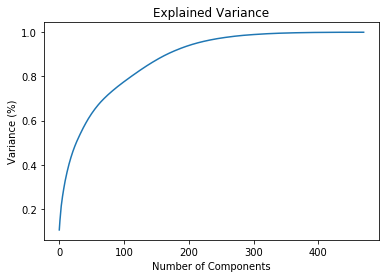

In [37]:
data = data.drop(['trg_pd', 'trg_grace'], axis = 1)
pca = PCA().fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

In [40]:
sum(pca.explained_variance_ratio_[0:170])

0.9040439385286284

In [41]:
pca = PCA(n_components=170)
data_pca = pca.fit_transform(data)

In [42]:
data_pca = pd.DataFrame(data_pca)

# Tree classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[8.24928470e-05 5.22688365e-04 6.04293785e-04 2.62217902e-04
 4.76784377e-04 9.07981581e-05 6.87346880e-04 2.29162802e-04
 7.75156461e-04 3.51900549e-04 4.00903466e-04 1.82313662e-04
 5.64262236e-04 2.27789066e-04 3.94193021e-05 2.16624238e-04
 1.51973362e-04 4.34225485e-04 7.63457912e-05 2.68557438e-04
 8.23618907e-04 2.79312351e-04 2.49390580e-04 1.28532284e-04
 4.90206074e-04 5.38649021e-04 1.40831057e-04 2.57160421e-04
 8.32109141e-05 1.73600414e-05 0.00000000e+00 1.70622523e-04
 7.56380527e-05 1.35942913e-04 1.72419794e-04 6.11176712e-04
 4.58760269e-04 1.13574291e-04 0.00000000e+00 0.00000000e+00
 9.92661968e-05 4.70394080e-04 2.26979873e-05 3.43177045e-04
 1.63657977e-05 1.03235415e-04 2.06002649e-04 3.85573404e-04
 2.93527594e-04 7.14396362e-04 3.52859612e-04 5.80850996e-04
 5.41076663e-04 4.10024388e-04 6.30457237e-04 4.50597089e-04
 9.72536827e-04 2.88349074e-04 4.50493583e-04 1.36685646e-04
 4.11461790e-04 2.62154443e-03 4.65333395e-03 5.27018055e-03
 3.24751398e-03 4.404407

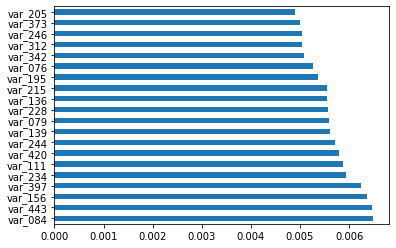

In [46]:
tree = RandomForestClassifier()
tree.fit(data, y1)
print(tree.feature_importances_) 
feat_importances = pd.Series(tree.feature_importances_, index=data.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Сравнение методов

In [47]:
feat_set = [list(features1), selected_features_be, list(imp_coef[imp_coef != 0].index)]

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y1, test_size=0.3, stratify=y1)

In [49]:
from sklearn.metrics import classification_report, roc_auc_score
tuned_parameters = {'alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}
final_clf = GridSearchCV(SGDClassifier(loss='log', penalty='l2')
                  ,tuned_parameters, cv=10, scoring='accuracy')

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
for i in feat_set:
    final_clf.fit(X_train[i], y_train)
    y_pred = final_clf.predict(X_test[i])
    y_proba = final_clf.predict_proba(X_test[i])
    print(classification_report(y_test, y_pred))
    print(roc_auc_score(y_test, y_proba[...,1]))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     17742
           1       0.00      0.00      0.00      1227

    accuracy                           0.94     18969
   macro avg       0.47      0.50      0.48     18969
weighted avg       0.87      0.94      0.90     18969

0.5914149858007333
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     17742
           1       0.00      0.00      0.00      1227

    accuracy                           0.94     18969
   macro avg       0.47      0.50      0.48     18969
weighted avg       0.87      0.94      0.90     18969

0.6109324201998086
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     17742
           1       0.00      0.00      0.00      1227

    accuracy                           0.94     18969
   macro avg       0.47      0.50      0.48     18969
weighted avg       0.87      0.94   

In [54]:
final_clf.score(X_test[feat_set[2]], y_test)

0.9353155147872845

In [55]:
len(feat_set[2])

311

In [56]:
X_PCA_train, X_PCA_test, y_pca_train, y_pca_test = train_test_split(data_pca, y1, test_size=0.3, stratify=y1)

In [57]:
final_clf.fit(X_PCA_train, y_pca_train)
y_pca_pred = final_clf.predict(X_PCA_test)
y_proba = final_clf.predict_proba(X_PCA_test)
print(classification_report(y_pca_test, y_pca_pred))
print(roc_auc_score(y_pca_test, y_proba[..., 1]))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     17742
           1       0.00      0.00      0.00      1227

    accuracy                           0.94     18969
   macro avg       0.47      0.50      0.48     18969
weighted avg       0.87      0.94      0.90     18969

0.6194856972395332


In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
model = LogisticRegression().fit(X_train, y_train)

In [60]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_proba[..., 1]))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     17742
           1       0.17      0.00      0.01      1227

    accuracy                           0.93     18969
   macro avg       0.55      0.50      0.49     18969
weighted avg       0.89      0.93      0.90     18969

0.6282150468404462


In [61]:
from sklearn.ensemble import AdaBoostClassifier

In [62]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.001)

In [63]:
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=0.001, n_estimators=100, random_state=0)

In [64]:
clf.score(X_test, y_test)

0.9353155147872845

In [65]:
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_proba[..., 1]))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     17742
           1       0.00      0.00      0.00      1227

    accuracy                           0.94     18969
   macro avg       0.47      0.50      0.48     18969
weighted avg       0.87      0.94      0.90     18969

0.5758488714038225


# Trying features from Xgboost

In [67]:
xg_feat = ['var_407', 'var_076', 'var_090', 'var_333', 'var_103', 'var_077',
       'var_105', 'var_094', 'var_397', 'var_383', 'var_238', 'var_123',
       'var_243', 'var_125', 'var_223', 'var_239', 'var_101', 'var_084',
       'var_389', 'var_150']

In [68]:
Train_xg = X_train[xg_feat]
Test_xg = X_test[xg_feat]

In [69]:
model_xg = LogisticRegression().fit(Train_xg, y_train)
y_pred = model_xg.predict(Test_xg)
y_proba = model_xg.predict_proba(Test_xg)
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_proba[..., 1]))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     17742
           1       0.00      0.00      0.00      1227

    accuracy                           0.94     18969
   macro avg       0.47      0.50      0.48     18969
weighted avg       0.87      0.94      0.90     18969

0.6033713830134492


# Trying features from CatBoost

In [70]:
cat_feat = ['var_050', 'var_077', 'var_103', 'var_109', 'var_119', 'var_122',
       'var_125', 'var_136', 'var_139', 'var_176', 'var_177', 'var_215',
       'var_224', 'var_229', 'var_244', 'var_312', 'var_329', 'var_330',
       'var_340', 'var_354', 'var_355', 'var_362', 'var_364', 'var_367',
       'var_376', 'var_377', 'var_386', 'var_390', 'var_396', 'var_407',
       'var_408', 'var_420', 'var_425', 'var_426', 'var_432', 'var_457',
       'var_458', 'var_062_orient']

In [71]:
Train_cat = X_train[cat_feat]
Test_cat = X_test[cat_feat]

In [72]:
model_cat = LogisticRegression().fit(Train_cat, y_train)
y_pred = model_cat.predict(Test_cat)
y_proba = model_cat.predict_proba(Test_cat)
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_proba[..., 1]))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     17742
           1       0.00      0.00      0.00      1227

    accuracy                           0.94     18969
   macro avg       0.47      0.50      0.48     18969
weighted avg       0.87      0.94      0.90     18969

0.6084033236693246


In [73]:
len(feat_set[0])

22

In [74]:
len(feat_set[1])

43

In [75]:
len(feat_set[2])

311

In [76]:
len(xg_feat)

20

In [77]:
len(cat_feat)

38